In [34]:
import warnings
warnings.filterwarnings("ignore")
from glob import glob
import pandas as pd

# Load Merged and Cleaned Data

In [35]:
AllData_df = pd.read_feather("../data/clean/CleanedData.feather")
AllData_df

,LCLid,Date,KWH,volume weighted price,index,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,MAC000002,2012-10-12,7.098,42.99,12338,5.0,6.4,106.0,13.5,12.3,9.7,0.0,100580.0,0.0
1,MAC000003,2012-10-12,13.434,42.99,12338,5.0,6.4,106.0,13.5,12.3,9.7,0.0,100580.0,0.0
2,MAC000004,2012-10-12,1.522,42.99,12338,5.0,6.4,106.0,13.5,12.3,9.7,0.0,100580.0,0.0
3,MAC000005,2012-10-12,4.448,42.99,12338,5.0,6.4,106.0,13.5,12.3,9.7,0.0,100580.0,0.0
4,MAC000006,2012-10-12,4.074,42.99,12338,5.0,6.4,106.0,13.5,12.3,9.7,0.0,100580.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,MAC000267,2011-12-05,12.654,43.18,12026,1.0,3.1,35.0,9.0,4.8,1.9,0.0,100610.0,0.0
1048571,MAC000268,2011-12-05,3.099,43.18,12026,1.0,3.1,35.0,9.0,4.8,1.9,0.0,100610.0,0.0
1048572,MAC000269,2011-12-05,1.116,43.18,12026,1.0,3.1,35.0,9.0,4.8,1.9,0.0,100610.0,0.0
1048573,MAC000270,2011-12-05,12.937,43.18,12026,1.0,3.1,35.0,9.0,4.8,1.9,0.0,100610.0,0.0


### Load Electricity Cost

In [36]:

# electricity_cost_df = pd.DataFrame()
# electricity_cost_data_paths = glob("../data/clean/2*.xls")
# for electricity_cost_data_path in electricity_cost_data_paths:
#     electricity_cost_df = pd.concat([pd.read_csv(electricity_cost_data_path), electricity_cost_df])
# electricity_cost_df["Datetime"] = pd.to_datetime(electricity_cost_df["Datetime"], format="%d-%b-%y")

In [37]:
# electricity_cost_df.sort_values("Datetime").head()

### Load Energy Usage

In [38]:
# energy_df = pd.read_csv("../data/clean/LondonEnergy.xls")
# energy_df["Date"] = pd.to_datetime(energy_df["Date"], format="%m/%d/%Y")
# total_starting_rows = len(energy_df.index)
# energy_df.sort_values("Date").head()

### Load Weather Data

In [39]:
# weather_df = pd.read_csv("../data/clean/LondonWeather.xls")
# weather_df["date"] = pd.to_datetime(weather_df["date"], format="%Y%m%d")
# weather_df.sort_values("date").head()

# Merge Datasets

In [40]:
# merged_df = pd.merge(energy_df, electricity_cost_df, left_on="Date", right_on="Datetime")
# merged_df = pd.merge(merged_df, weather_df, left_on="Date", right_on="date")
# print(merged_df.columns)
# merged_df.head()

In [41]:
# assert(len(merged_df.index) == total_starting_rows) # Assert we didn't lose any data

In [42]:
# # Drop redundant date columns
# merged_df = merged_df.drop(["Datetime", "date"], axis=1)

# Test Train Split
For the test train split on time series data, we will use a rolling k fold

https://stats.stackexchange.com/questions/14099/using-k-fold-cross-validation-for-time-series-model-selection
```
Split 1: Test [1] Train [2]
Split 2: Test [1, 2] Train [3]
Split 3: Test [1, 2, 3] Train [4]
Split 4: Test [1, 2, 3, 4] Train [5]
Split 5: Test [1, 2, 3, 4, 5] Train [6]
```

In [43]:
import numpy as np

first_date = AllData_df["Date"].min()
AllData_df['DateIndex'] = AllData_df["Date"].apply(lambda x: (x- first_date).days).astype(int)
AllData_df = AllData_df.reindex(np.arange(len(AllData_df.index)))
AllData_df = AllData_df.sort_values("DateIndex")
AllData_df.head()

,LCLid,Date,KWH,volume weighted price,index,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,DateIndex
1047702,MAC000156,2011-11-23,6.523,49.85,12014,7.0,2.0,35.0,13.5,6.8,2.6,0.2,102720.0,0.0,0
1047703,MAC000157,2011-11-23,7.408,49.85,12014,7.0,2.0,35.0,13.5,6.8,2.6,0.2,102720.0,0.0,0
1047701,MAC000155,2011-11-23,9.281,49.85,12014,7.0,2.0,35.0,13.5,6.8,2.6,0.2,102720.0,0.0,0
1047700,MAC000154,2011-11-23,5.798,49.85,12014,7.0,2.0,35.0,13.5,6.8,2.6,0.2,102720.0,0.0,0
1047699,MAC000153,2011-11-23,21.702,49.85,12014,7.0,2.0,35.0,13.5,6.8,2.6,0.2,102720.0,0.0,0


<Axes: title={'center': 'Data Distrubtion by Date'}, xlabel='Date', ylabel='Count'>

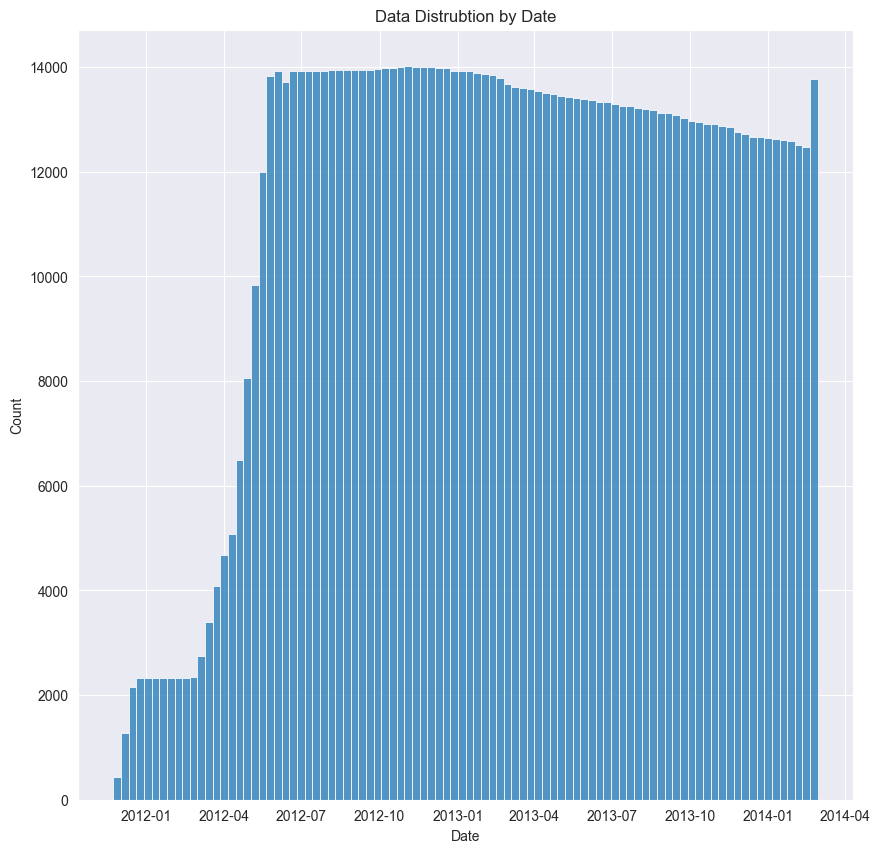

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title("Data Distrubtion by Date")
sns.histplot(AllData_df["Date"], bins=92)

In [45]:
# Split Data into 6 even segments.
SPLIT_COUNT = 6

splits = []
date_indexes = AllData_df["DateIndex"]
data_length = len(date_indexes)
for i in range(SPLIT_COUNT):
    split = date_indexes[int(i * data_length / SPLIT_COUNT):int((i+1) * data_length / SPLIT_COUNT)]
    splits.append((split.min(), split.max()))
    if i != 0:
        if splits[i][0] == splits[i-1][1]:
            splits[i] = (splits[i][0] + 1, splits[i][1])

splits

[(0, 242), (243, 354), (355, 467), (468, 584), (585, 704), (705, 828)]

In [46]:
AllData_df["split"] = -1
for i, split in enumerate(splits):
    print(f"Split {i} has length: {len(AllData_df[(AllData_df['DateIndex'] >= split[0]) & (AllData_df['DateIndex'] <= split[1])].index )}")
    AllData_df.loc[(AllData_df["DateIndex"] >= split[0]) & (AllData_df["DateIndex"] <= split[1]), "split"] = i

Split 0 has length: 176003
Split 1 has length: 173755
Split 2 has length: 174567
Split 3 has length: 175042
Split 4 has length: 174849
Split 5 has length: 174359


<Axes: title={'center': '6 Folds for Test Train Split'}, xlabel='DateIndex', ylabel='Count'>

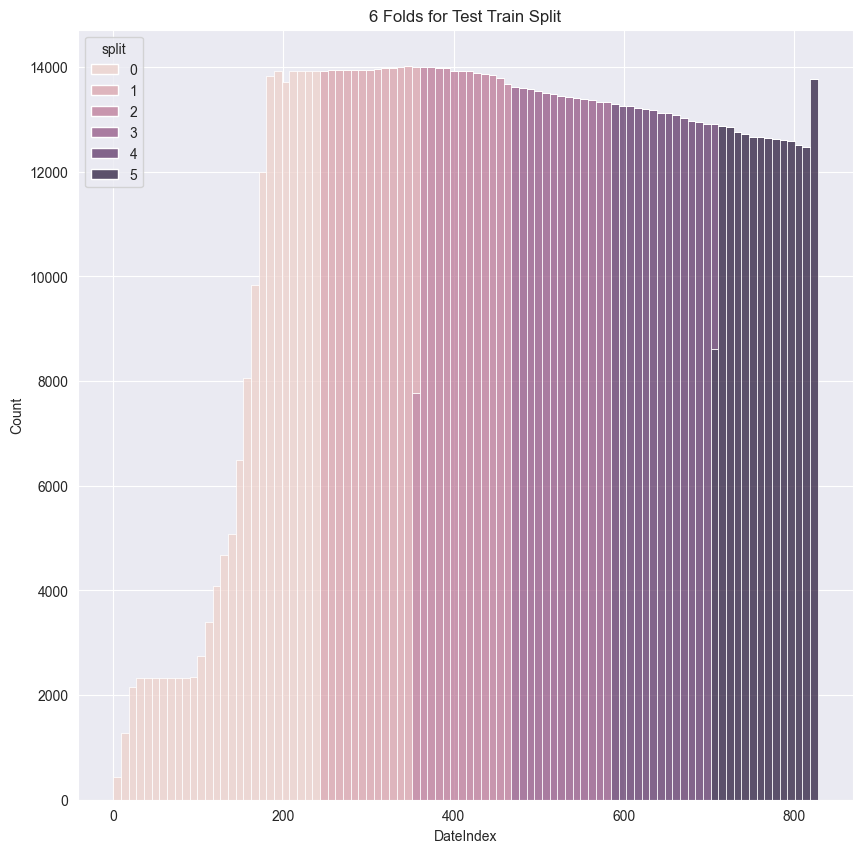

In [47]:
plt.figure(figsize=(10,10))
plt.title("6 Folds for Test Train Split")
sns.histplot(data=AllData_df, x="DateIndex", hue="split", multiple="stack", bins=92)

In [48]:
import os
os.makedirs("../data/test_train_split", exist_ok=True)

for i in range(len(splits) - 1):
    train_df = AllData_df[AllData_df["split"] <= i]
    train_df = train_df.drop(["DateIndex", "split"], axis=1)
    print(f"Train {i} has length {len(train_df.index)}")
    train_df.to_feather(f"../data/test_train_split/train_{i}.feather")

    test_df = AllData_df[AllData_df["split"] == i+1]
    test_df = test_df.drop(["DateIndex", "split"], axis=1)
    print(f"Test {i} has length {len(test_df.index)}")
    test_df.to_feather(f"../data/test_train_split/test_{i}.feather")

Train 0 has length 176003
Test 0 has length 173755
Train 1 has length 349758
Test 1 has length 174567
Train 2 has length 524325
Test 2 has length 175042
Train 3 has length 699367
Test 3 has length 174849
Train 4 has length 874216
Test 4 has length 174359
